In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [3]:
BHousing = pd.read_csv('BostonHousing.csv')

BHousing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
BHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
BHousing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
BHousing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

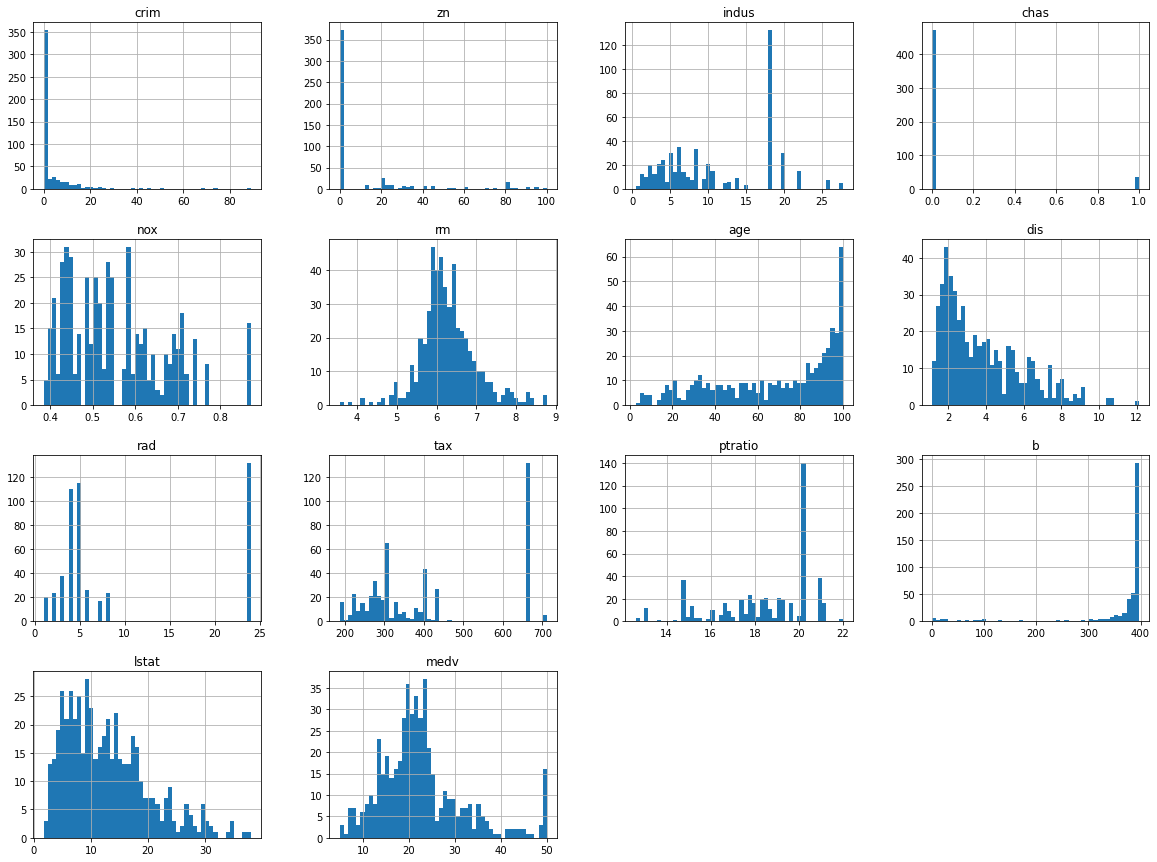

In [7]:
%matplotlib inline

BHousing.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:>

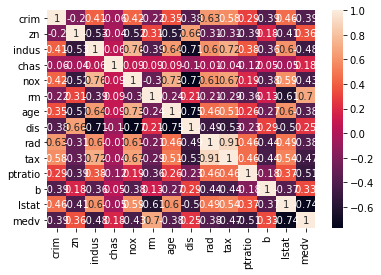

In [8]:
correlation_matrix = BHousing.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [13]:
X= BHousing['rm'].values.reshape(-1,1)
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [14]:
Y= BHousing['medv'].values.reshape(-1,1)
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("Trainning Linear Regression Model")

Trainning Linear Regression Model


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_train_predict = model.predict(X_train)
print(y_train_predict)

[[21.65451322]
 [25.76833644]
 [19.11413948]
 [25.17060144]
 [27.21872283]
 [18.74495022]
 [19.87888867]
 [27.16598151]
 [17.09238876]
 [20.09864418]
 [11.13261922]
 [22.01491226]
 [10.57004511]
 [24.93326549]
 [23.74658571]
 [10.74584952]
 [21.73362521]
 [16.31884935]
 [36.18474779]
 [16.78473104]
 [20.05469308]
 [22.22587756]
 [13.03130686]
 [18.31422941]
 [30.27771958]
 [-1.25280153]
 [23.65868351]
 [21.3029044 ]
 [19.43058742]
 [19.59760161]
 [29.09983003]
 [30.26892936]
 [17.55827044]
 [23.55320086]
 [17.66375309]
 [25.72438534]
 [17.66375309]
 [27.74613606]
 [24.53770556]
 [24.98600681]
 [22.19950689]
 [22.34015042]
 [22.19950689]
 [15.38708597]
 [14.94757494]
 [29.75030635]
 [30.60295774]
 [12.21381635]
 [36.18474779]
 [25.4958396 ]
 [25.24092321]
 [14.06855289]
 [23.50045954]
 [20.99524668]
 [22.99062674]
 [19.51848963]
 [18.78890132]
 [25.61890269]
 [ 3.81915572]
 [18.86801331]
 [21.45233815]
 [19.75582558]
 [22.79724189]
 [18.92075463]
 [23.05215829]
 [26.11115504]
 [26.58582

Text(0, 0.5, 'Predicted Y')

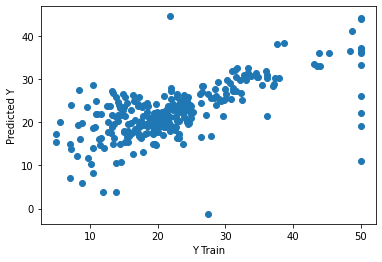

In [21]:
plt.scatter(y_train,y_train_predict)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')

In [80]:
from sklearn import metrics

print('Mean Absolute Error:    ', metrics.mean_absolute_error(y_train, y_train_predict))
print('Mean Square Error:      ', metrics.mean_squared_error(y_train, y_train_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error:     7.749080649107209
Mean Square Error:       104.9305600345171
Root Mean Square Error:  10.243561882202748


In [26]:
y_test_predict = model.predict(X_test)
print(y_test_predict)

[[29.11741047]
 [21.52265991]
 [25.73317556]
 [23.83448792]
 [22.05007315]
 [21.52265991]
 [23.79932704]
 [22.9730463 ]
 [24.69592953]
 [22.38410153]
 [16.66166795]
 [26.56824651]
 [19.61518205]
 [23.1840116 ]
 [18.34060007]
 [28.9591865 ]
 [25.71559512]
 [29.67119436]
 [21.61056212]
 [20.0634833 ]
 [11.50180849]
 [34.64645919]
 [25.27608409]
 [31.16553186]
 [21.03040756]
 [27.58791209]
 [22.95546586]
 [11.15898988]
 [38.06585499]
 [27.64944364]
 [17.48794868]
 [22.70054947]
 [39.93817197]
 [23.45650843]
 [21.3029044 ]
 [32.43132362]
 [18.72736978]
 [40.10518616]
 [20.03711264]
 [17.78681618]
 [19.19325147]
 [20.7491205 ]
 [23.93118034]
 [15.96724052]
 [24.23883806]
 [25.82986798]
 [22.9290952 ]
 [14.42016171]
 [23.85206836]
 [21.65451322]
 [15.14975001]
 [20.3183997 ]
 [23.92239012]
 [28.80096253]
 [28.81854297]
 [20.26565837]
 [19.62397227]
 [19.84372779]
 [21.2589533 ]
 [14.46411281]
 [24.49375446]
 [19.53607007]
 [30.78755237]
 [25.39914718]
 [21.65451322]
 [26.88469445]
 [21.09193

Text(0, 0.5, 'Predicted Y')

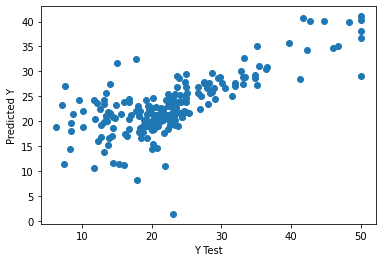

In [18]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [79]:
from sklearn import metrics

print('Mean Absolute Error:    ', metrics.mean_absolute_error(y_test, y_test_predict))
print('Mean Square Error:      ', metrics.mean_squared_error(y_test, y_test_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

Mean Absolute Error:     8.627603921270982
Mean Square Error:       132.8756164773779
Root Mean Square Error:  11.527168623620367


In [60]:
compare = pd.DataFrame(
    {
        "Actual":[y_test], 
        "Prediction": [y_test_predict]
    }
)
print(compare)

                                              Actual  \
0  [[23.7], [16.7], [20.3], [50.0], [27.5], [19.0...   

                                          Prediction  
0  [[29.117410468107188], [21.522659912539318], [...  


<AxesSubplot:xlabel='rm', ylabel='medv'>

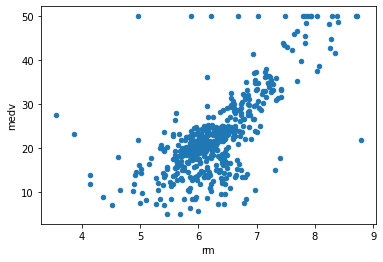

In [61]:
BHousing.plot.scatter('rm', 'medv')

C:\Users\intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'medv')

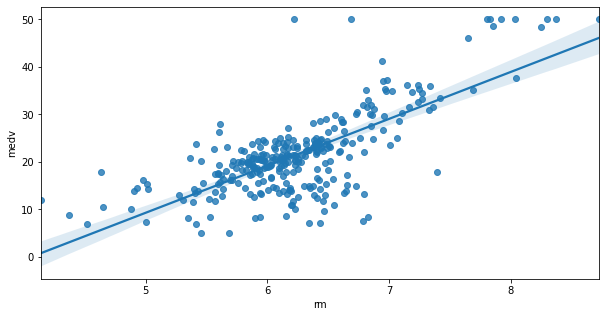

In [69]:
plt.figure(figsize=(10,5))

sns.regplot(X_train,y_train)
plt.xlabel('rm')
plt.ylabel('medv')

C:\Users\intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'medv')

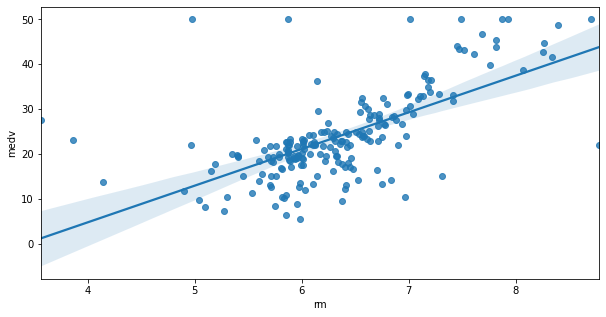

In [70]:
plt.figure(figsize=(10,5))

sns.regplot(X_test,y_test)
plt.xlabel('rm')
plt.ylabel('medv')

In [13]:
k=np.array([5,10,15,2,1]).reshape(-1,1)
model.predict(k)

array([[ 10.83992413],
       [ 56.35046904],
       [101.86101394],
       [-16.46640281],
       [-25.5685118 ]])